In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os   

In [2]:
!kaggle datasets download -d mathchi/churn-for-bank-customers

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.16) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
churn-for-bank-customers.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
churn_data = pd.read_csv(os.getcwd() + '/churn.csv')
churn_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
churn_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
churn_df = churn_data.drop(labels=['RowNumber'], axis=1)
churn_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


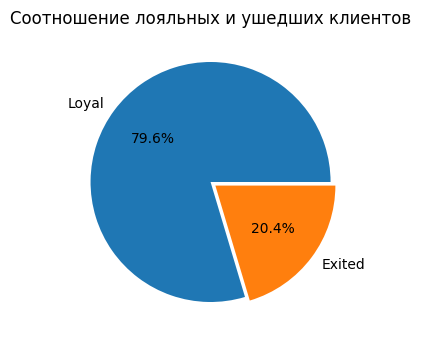

In [6]:
not_exit, exit = churn_df['Exited'].value_counts()
exited_fig = plt.figure(figsize=(3, 3))
exited_pie = exited_fig.add_axes([0, 0, 1, 1])
exited_pie.pie(
    x=[not_exit, exit],
    labels=['Loyal', 'Exited'],
    explode=[0, 0.05],
    autopct='%.1f%%'
);
exited_pie.set_title('Соотношение лояльных и ушедших клиентов');

Text(0.5, 1.0, 'Распреление баланса пользователей (баланс > 2500$)')

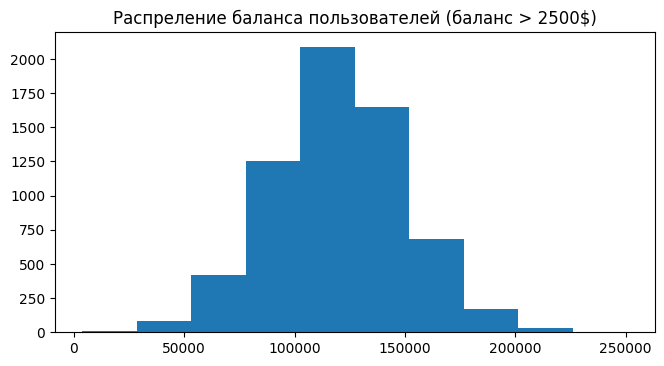

In [7]:
balance_over2500 = churn_df[churn_df['Balance'] > 2500]['Balance']
bal_over2500_fig = plt.figure(figsize=(6, 3))
bal_hist = bal_over2500_fig.add_axes([0, 0, 1, 1])
bal_hist.hist(
    x=balance_over2500,
    bins=10
);
bal_hist.set_title('Распреление баланса пользователей (баланс > 2500$)')

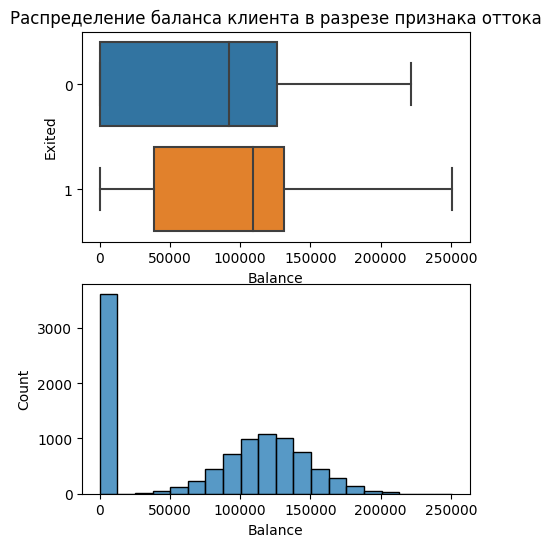

In [8]:
bal_age_data = churn_df[['Balance', 'Exited']]
bal_age_fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 6))
bal_age_boxplot = sns.boxplot(
    data=bal_age_data,
    x='Balance',
    y='Exited',
    orient='horizontal',
    ax=axes[0],
    fliersize=10,
)
bal_age_boxplot.set_title('Распределение баланса клиента в разрезе признака оттока');
sns.histplot(
    data=bal_age_data,
    x='Balance',
    bins=20,
    ax=axes[1]
);

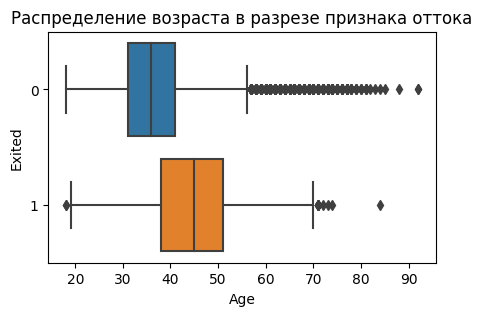

In [9]:
age_exited = churn_df[['Age', 'Exited']]
age_exited_fig = plt.figure(figsize=(5, 3))
age_exited_boxplot = sns.boxplot(
    data=age_exited,
    orient='horizontal',
    x='Age',
    y='Exited'
)
age_exited_boxplot.set_title('Распределение возраста в разрезе признака оттока');

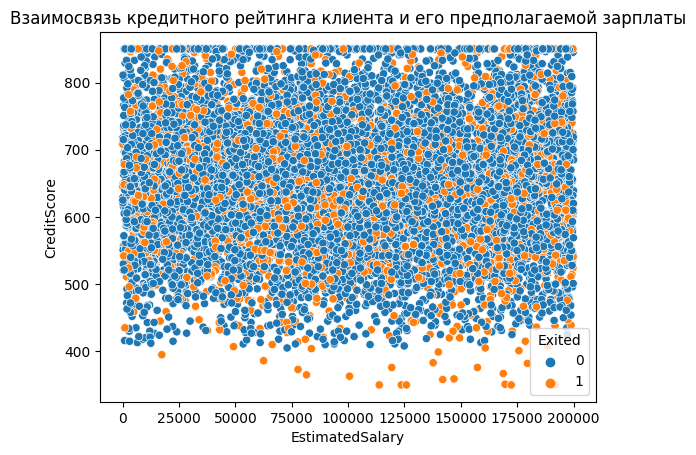

In [10]:
cred_sal_ex = churn_df[['CreditScore', 'EstimatedSalary', 'Exited']]
cred_sal_ex_scatter = sns.scatterplot(
    data=cred_sal_ex,
    x='EstimatedSalary',
    y='CreditScore',
    hue='Exited'
)
cred_sal_ex_scatter.set_title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты');

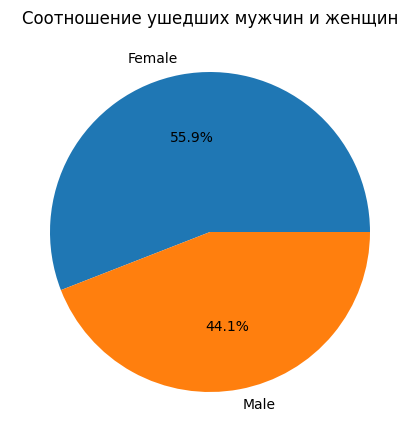

In [11]:
gend_exited = churn_df[['Gender', 'Exited']]
gend_exited = gend_exited[gend_exited['Exited'] == 1]
f, m = gend_exited['Gender'].value_counts()
f_exit = f / len(gend_exited)
m_exit = m / len(gend_exited)
fig = plt.figure(figsize=(4,4))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    x=[f_exit, m_exit],
    labels=['Female', 'Male'],
    autopct='%1.1f%%'
)
axes.set_title('Соотношение ушедших мужчин и женщин');

,Exit,Loyal
,,
NumOfProducts,,
1,1409,3675
2,348,4242
3,220,46
4,60,0


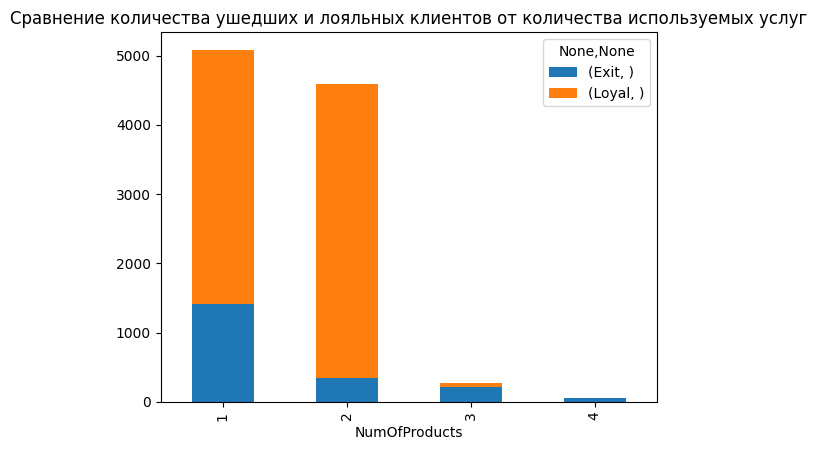

In [12]:
nop_exit = churn_df.pivot_table(
    values='Exited',
    index='NumOfProducts',
    aggfunc=['count', 'sum']
)
nop_exit['Exit'] = nop_exit['sum']['Exited']
nop_exit['Loyal'] = nop_exit['count']['Exited'] - nop_exit['sum']['Exited']
nop_exit = nop_exit.drop(['count', 'sum'], axis=1)
bars_axes = nop_exit.plot(
    kind='bar',
    stacked=True
);
bars_axes.set_title('Сравнение количества ушедших и лояльных клиентов от количества используемых услуг');
nop_exit

Text(0.5, 1.0, 'Соотношение ушедших и лояльных пользователей в зависимости от их статуса активности')

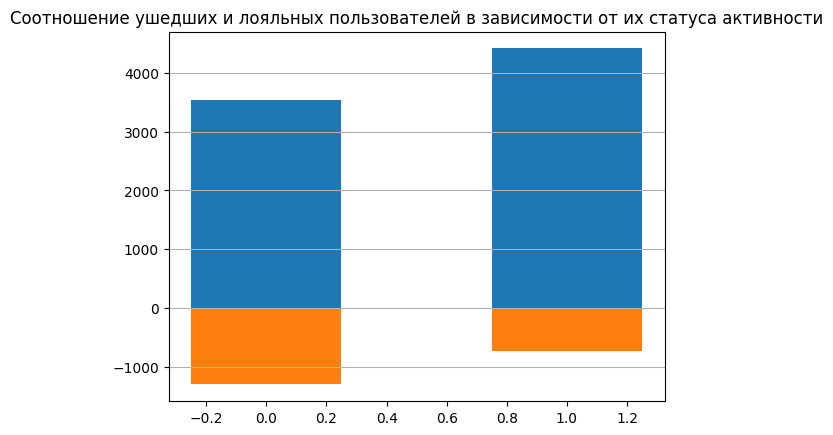

In [13]:
iam_exited = churn_df.pivot_table(
    values='Exited',
    index='IsActiveMember',
    aggfunc=['count', 'sum']
)
iam_exited['Exit'] = iam_exited['sum']['Exited']
iam_exited['Loyal'] = iam_exited['count']['Exited'] - iam_exited['Exit']
iam_exited = iam_exited.drop(['sum', 'count'], axis=1)
plt.bar(
    x=iam_exited.index, 
    height=iam_exited['Loyal'],
    width=0.5
);
plt.bar(
    x=iam_exited.index,
    height=-iam_exited['Exit'],
    width=0.5,
);
plt.grid(axis='y')
plt.title('Соотношение ушедших и лояльных пользователей в зависимости от их статуса активности')

In [14]:
churn_df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [15]:
cntry_exited = churn_df.pivot_table(
    values='Exited',
    index='Geography',
    aggfunc=['count', 'sum']
)
percents = []
for country in cntry_exited.index:
    percents.append(cntry_exited.loc[country]['sum']['Exited'] / cntry_exited.loc[country]['count']['Exited'] * 100)
px.choropleth(
    data_frame=cntry_exited,
    locations=cntry_exited.index,
    locationmode='country names',
    color=percents,
    title='Тепловая карта доли ушедших по странам',
    color_continuous_scale='Reds'
)